<h2 id="70-単語ベクトルの和による特徴量">70. 単語ベクトルの和による特徴量</h2>
<p>問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例\(x_i\)の特徴ベクトル\(\boldsymbol{x}_i\)を並べた行列\(X\)と，正解ラベルを並べた行列（ベクトル）\(Y\)を作成したい．</p>

<p>\[X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}}\]</p>

<p>ここで，\(n\)は学習データの事例数であり，\(\boldsymbol{x}_i \in \mathbb{R}^d\)と\(y_i \in \mathbb{N}\)はそれぞれ，\(i \in \{1, \dots, n\}\)番目の事例の特徴量ベクトルと正解ラベルを表す．
なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．\(\mathbb{N}_{&lt;4}\)で\(4\)未満の自然数（\(0\)を含む）を表すことにすれば，任意の事例の正解ラベル\(y_i\)は\(y_i \in \mathbb{N}_{&lt;4}\)で表現できる．
以降では，ラベルの種類数を\(L\)で表す（今回の分類タスクでは\(L=4\)である）．</p>
<p>\(i\)番目の事例の特徴ベクトル\(\boldsymbol{x}_i\)は，次式で求める．</p>

<p>\[\boldsymbol{x}_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t}))\]</p>

<p>ここで，\(i\)番目の事例は\(T_i\)個の（記事見出しの）単語列\((w_{i,1}, w_{i,2}, \dots, w_{i,T_i})\)から構成され，\(\mathrm{emb}(w) \in \mathbb{R}^d\)は単語\(w\)に対応する単語ベクトル（次元数は\(d\)）である．すなわち，\(i\)番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものが\(\boldsymbol{x}_i\)である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．\(300\)次元の単語ベクトルを用いたので，\(d=300\)である．</p>
<p>\(i\)番目の事例のラベル\(y_i\)は，次のように定義する．</p>

<p>\[y_i = \begin{cases}
0 &amp; (\mbox{記事}x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 &amp; (\mbox{記事}x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 &amp; (\mbox{記事}x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 &amp; (\mbox{記事}x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}}\]</p>

<p>なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．</p>
<p>以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．</p>
<ul>
<li>学習データの特徴量行列: \(X_{\rm train} \in \mathbb{R}^{N_t \times d}\)</li>
<li>学習データのラベルベクトル: \(Y_{\rm train} \in \mathbb{N}^{N_t}\)</li>
<li>検証データの特徴量行列: \(X_{\rm valid} \in \mathbb{R}^{N_v \times d}\)</li>
<li>検証データのラベルベクトル: \(Y_{\rm valid} \in \mathbb{N}^{N_v}\)</li>
<li>評価データの特徴量行列: \(X_{\rm test} \in \mathbb{R}^{N_e \times d}\)</li>
<li>評価データのラベルベクトル: \(Y_{\rm test} \in \mathbb{N}^{N_e}\)</li>
</ul>
<p>なお，\(N_t, N_v, N_e\)はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．</p>


In [5]:
# !cp /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter06/data/NewsAggregatorDataset.zip /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/NewsAggregatorDataset.zip 

ここから問題50からのコピペ

In [5]:
# !unzip /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/NewsAggregatorDataset.zip

Archive:  /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [2]:
# データ分割
import pandas as pd
# csvファイルを読み込む
path = "/Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/newsCorpora.csv"
df = pd.read_table(path, header=None, sep='\\t', engine='python')
df.columns = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']
# 先頭5つ表示
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
# PUBLISHERが特定の行のみを取り出す
publishers = ['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']
daily_mails = df[df['PUBLISHER'].isin(publishers)]
len(daily_mails)  # 取り出した行数

13356

In [4]:
from sklearn.model_selection import train_test_split
# 訓練データ、検証データ、テストデータに分ける
# stratifyで偏りを減らしてみる
train_data, non_train, train_target, non_train_target = train_test_split(daily_mails[['TITLE', 'CATEGORY']], daily_mails['CATEGORY'], train_size=0.8, random_state=10, stratify=daily_mails['CATEGORY'])
valid_data, test_data, valid_target, test_target = train_test_split(non_train, non_train_target, train_size=0.5, random_state=10,  stratify=non_train_target)
print(len(train_data), len(valid_data), len(test_data))

# テキストファイルに書き込む
train_data.to_csv('work/train.txt', header=None, index=None, sep='\t')
valid_data.to_csv('work/valid.txt', header=None, index=None, sep='\t')
test_data.to_csv('work/test.txt', header=None, index=None, sep='\t')

10684 1336 1336


ここから問題60からのコピペ

In [5]:
# !cp /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter07/data/GoogleNews-vectors-negative300.bin /Users/nyuton/Documents/100knock-2023/trainee_nyutonn/chapter08/data/GoogleNews-vectors-negative300.bin

In [9]:
from gensim.models import KeyedVectors

# 学習済みモデルを読み込む
# modelは単語辞書形式で中身はベクトル
model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True) 

# 例
print(type(model))  # <class 'gensim.models.keyedvectors.KeyedVectors'>
print(model.vectors.shape)      # 語彙数 x ベクトル次元数 を表示
print(model['apple'].shape)  # 単語ベクトルの型
# print(model['United_States'])   # United Statesの単語ベクトルを表示

<class 'gensim.models.keyedvectors.KeyedVectors'>
(3000000, 300)
(300,)


ここからラベルと特徴量の変換をする
* 特徴量 X：テキスト -> 単語ベクトルの平均
* ラベル y：b, e, m, t -> 0, 1, 2, 3

In [10]:
# テキストとラベルの抽出
def extract_text_label(path):
    X_text = []
    y_label = []
    with open(path, "r") as fr:
        for line in fr:
            line = line.rstrip()
            text, label = line.split("\t")
            X_text.append(text)
            y_label.append(label)
    return X_text, y_label
        

X_train_text, y_train_label = extract_text_label("work/train.txt")
X_valid_text, y_valid_label = extract_text_label("work/valid.txt")
X_test_text, y_test_label = extract_text_label("work/test.txt")
print(len(X_train_text), len(y_train_label))

10684 10684


In [11]:
# ラベルをindexに変更
def label2index(label):
    if label == "b":
        return 0
    elif label == "e":
        return 1
    elif label == "t":
        return 2
    elif label == "m":
        return 3

y_train = list(map(label2index, y_train_label))
y_valid = list(map(label2index, y_valid_label))
y_test = list(map(label2index, y_test_label))

In [12]:
# 保存する練習
import numpy as np
a = np.array([[0, 1, 2], [2, 3, 4]])
np.save("test.npy", a)

In [13]:
# 保存したものをロードする練習
b = np.load("test.npy")
b

array([[0, 1, 2],
       [2, 3, 4]])

In [14]:
# めちゃめちゃ時間かかるので注意！ -> 次元数と語彙数を勘違いしていたので修正したら一瞬で終わった
import numpy as np
from tqdm import tqdm # 進捗表示
model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True) 

# 特徴量をテキストから単語ベクトルの平均に変換
def text2emb_vec(X, output_path):
    emb_vecs = []
    for x in tqdm(X): # 経過時間の表示
        words = x.split(" ") # 単語に分割
        sum_vec = np.zeros(300) # 初期化
        for word in words:
            # 辞書に単語が載っていないとエラーになるので，載っていないときは無視する
            if word in model:
                sum_vec += model[word] # 単語ベクトルを足していく
        ave_vec = sum_vec / len(words) # 平均にする
        emb_vecs.append(ave_vec) 
    
    np.save(output_path, emb_vecs) # 特徴量をファイルに保存する

X_train = text2emb_vec(X_train_text, "work/train_wordemb.npy")
X_valid = text2emb_vec(X_valid_text, "work/valid_wordemb.npy")
X_test = text2emb_vec(X_test_text, "work/test_wordemb.npy")

100%|██████████| 1336/1336 [00:00<00:00, 54192.28it/s]


In [15]:
a = np.load('work/test_wordemb.npy')
a.shape

(1336, 300)

In [16]:
a = np.load('work/test.text.npy')
a.shape

(1336, 300)

ここから答えの写し

In [13]:
# 1. extract certain publishers
publisher_of_interest = ("Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail")
                         
def extract_text(input_path, out_path, publisher_of_interest):
    with open(input_path, 'r') as fi, open(out_path, 'w') as fo:
        for line in fi:
            fields = line.strip().split('\t')
            headline = fields[1]
            publisher = fields[3]
            category_char = fields[4]
            if publisher in publisher_of_interest:
                fo.write("{}\t{}\n".format(category_char, headline))

extract_text('data/newsCorpora.csv', 'work/processed_article.tsv', publisher_of_interest)

In [14]:
# 2. random shuffling and splitting
import os
import random
from sklearn.model_selection import train_test_split

def shuffle_and_split(input_path, out_path):
    instances = [l.strip() for l in  open(input_path, 'r')]
    random.shuffle(instances)
    
    total_n = len(instances)
    train_instances, test_instances = train_test_split(instances, test_size=0.2)
    valid_instances, test_instances = train_test_split(test_instances, test_size=0.5)
    print('train instance: {}'.format(len(train_instances)))
    print('valid instance: {}'.format(len(valid_instances)))
    print('test instance: {}'.format(len(test_instances)))
    
    with open(os.path.join(out_path, 'train.txt'), 'w') as fo:
        for line in train_instances:
            fo.write("{}\n".format(line))

    with open(os.path.join(out_path, 'valid.txt'), 'w') as fo:
        for line in valid_instances:
            fo.write("{}\n".format(line))
    
    with open(os.path.join(out_path, 'test.txt'), 'w') as fo:
        for line in test_instances:
            fo.write("{}\n".format(line))

shuffle_and_split('work/processed_article.tsv', 'work')

train instance: 10684
valid instance: 1336
test instance: 1336


In [16]:
# Text files from No. 50 must be tokenized beforehand.
import nltk
nltk.download('punkt')

def tokenize(input_path, output_path):
    with open(input_path, 'r') as fi, open(output_path, 'w') as fo:
        for line in fi:
            category, headline = line.strip().split('\t')
            tokens = nltk.word_tokenize(headline)
            tkn_headline = ' '.join(tokens)
            fo.write('{}\t{}\n'.format(category, tkn_headline))

[nltk_data] Downloading package punkt to /Users/nyuton/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
tokenize('work/train.txt', 'work/train.tkn.txt')
tokenize('work/valid.txt', 'work/valid.tkn.txt')
tokenize('work/test.txt', 'work/test.tkn.txt')

In [18]:
from collections import defaultdict
import json

def create_label_to_index_file(input_path, output_path):
    label2index = defaultdict(lambda: len(label2index))
    with open(input_path, 'r') as fi:
        for line in fi:
            label = line.strip().split()[0]
            label2index[label]
#     print(label2index)
#     print(len(label2index))
    assert len(label2index) == 4
    json.dump(dict(label2index),  open(output_path, 'w'))

In [19]:
create_label_to_index_file('work/train.tkn.txt', 'work/label2index.json')
!cat work/label2index.json

{"b": 0, "m": 1, "e": 2, "t": 3}

In [20]:
import numpy as np

def convert_label_to_index(input_path, output_path, label2index_path):
    label2index = json.load(open(label2index_path))
    
    label_indices = []
    with open(input_path, 'r') as fi:
        for line in fi:
            category = line.strip().split('\t')[0]  # i.e., label
            index = label2index[category]
            label_indices.append(index)
    label_array = np.asarray(label_indices, 'i')
    print(f"label_array: {label_array}, shape: {label_array.shape}")
    np.save(output_path, label_array)

In [21]:
convert_label_to_index('work/train.tkn.txt', 'work/train.label.npy', 'work/label2index.json')
convert_label_to_index('work/valid.tkn.txt', 'work/valid.label.npy', 'work/label2index.json')
convert_label_to_index('work/test.tkn.txt', 'work/test.label.npy', 'work/label2index.json')

label_array: [0 0 1 ... 3 0 0], shape: (10684,)
label_array: [2 0 2 ... 3 2 0], shape: (1336,)
label_array: [2 2 2 ... 0 2 0], shape: (1336,)


In [22]:
from gensim.models import KeyedVectors
from tqdm import tqdm # 進捗表示

def convert_text_to_index(input_path, output_path, model):
    text_features = []
    with open(input_path, 'r') as fi:
        for line in tqdm(fi):
            text = line.strip().split('\t')[1]
            tokens = text.strip().split()
            # すべてのtokenが学習済み単語ベクトルの中に存在するわけではないのに注意すること。
            # 今回は、ベクトルが見つからなかった場合は諦める（無視する）という実装にした
        # なんでここがこんなに一瞬で終わるの？？
            word_matrix = np.stack([model[t] for t in tokens if t in model], axis=0)
            avg_vec = np.sum(word_matrix, axis=0) / len(tokens)
            text_features.append(avg_vec)
    # インスタンスの数が増えると物理メモリを圧迫する可能性があるので若干危険
    feature_matrix = np.stack(text_features, axis=0)
    np.save(output_path, feature_matrix)

In [23]:
# 単語ベクトルのロード
word_vec_path = './data/GoogleNews-vectors-negative300.bin'
wordvec_model = KeyedVectors.load_word2vec_format(word_vec_path, binary=True)

# 入力を特徴量に変換
convert_text_to_index('work/train.tkn.txt', 'work/train.text.npy', wordvec_model)
convert_text_to_index('work/valid.tkn.txt', 'work/valid.text.npy', wordvec_model)
convert_text_to_index('work/test.tkn.txt', 'work/test.text.npy', wordvec_model)

10684it [00:00, 31574.36it/s]
1336it [00:00, 16723.44it/s]
1336it [00:00, 31578.77it/s]


In [25]:
a = np.load('work/test.text.npy')
a.shape

(1336, 300)

In [27]:
b = np.load('work/test.label.npy')
b.shape
b

array([2, 2, 2, ..., 0, 2, 0], dtype=int32)

<h2 id="71-単層ニューラルネットワークによる予測">71. 単層ニューラルネットワークによる予測</h2>
<p>問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．</p>

<p>\[\hat{\boldsymbol{y}}_1 = {\rm softmax}(\boldsymbol{x}_1 W), \\
\hat{Y} = {\rm softmax}(X_{[1:4]} W))\]</p>

<p>ただし，\({\rm softmax}\)はソフトマックス関数，\(X_{[1:4]} \in \mathbb{R}^{4 \times d}\)は特徴ベクトル\(\boldsymbol{x}_1, \boldsymbol{x}_2, \boldsymbol{x}_3, \boldsymbol{x}_4\)を縦に並べた行列である．</p>

<p>\[X_{[1:4]} = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \boldsymbol{x}_3 \\ 
  \boldsymbol{x}_4 \\ 
\end{pmatrix}}\]</p>

<p>行列\(W \in \mathbb{R}^{d \times L}\)は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．なお，\(\hat{\boldsymbol{y}}_1 \in \mathbb{R}^L\)は未学習の行列\(W\)で事例\(x_1\)を分類したときに，各カテゴリに属する確率を表すベクトルである．
同様に，\(\hat{Y} \in \mathbb{R}^{n \times L}\)は，学習データの事例\(x_1, x_2, x_3, x_4\)について，各カテゴリに属する確率を行列として表現している．</p>


In [18]:
import numpy as np
import chainer
from chainer import cuda, Variable
from chainer import Chain
import chainer.functions as F
import chainer.links as L
import chainer.optimizers as O

/Users/nyuton/.pyenv/versions/anaconda3-2022.10/envs/ISHate/lib/python3.11/site-packages/chainer/_environment_check.py:33: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Please be aware that Mac OS X is not an officially supported OS.

  warnings.warn('''\


In [19]:
class SoftmaxLayer(Chain):
    # インスタンスの初期化
    def __init__(self, n_features, n_label):
        super(SoftmaxLayer, self).__init__()
        with self.init_scope():
            self.linear = L.Linear(n_features, n_label, nobias=True)

    # インスタンスを関数のように用いることができる
    def __call__(self, xs):
        ys = F.softmax(self.linear(xs))
        return ys

In [21]:
softmax_layer = SoftmaxLayer(n_features=300, n_label=4)
train_X = np.load('work/train.text.npy').astype('f') # astype？？

print(train_X.shape, train_X[0].shape, train_X[0][None].shape, train_X[0][1].shape, train_X[:4].shape)
# Noneを指定しないと1次元のベクトルになり，エラーになる
y1 = softmax_layer(train_X[0][None])
print(y1.data)
Y1_4 = softmax_layer(train_X[:4])
print(Y1_4.data)

(10684, 300) (300,) (1, 300) () (4, 300)
[[0.26860833 0.23525824 0.2515842  0.24454924]]
[[0.26860833 0.23525824 0.2515842  0.24454924]
 [0.26221195 0.22481003 0.2443342  0.26864383]
 [0.24191654 0.24789904 0.2512434  0.25894102]
 [0.26224676 0.22612016 0.2558404  0.25579265]]


<h2 id="72-損失と勾配の計算">72. 損失と勾配の計算</h2>
<p>学習データの事例\(x_1\)と事例集合\(x_1, x_2, x_3, x_4\)に対して，クロスエントロピー損失と，行列\(W\)に対する勾配を計算せよ．なお，ある事例\(x_i\)に対して損失は次式で計算される．</p>

<p>\[l_i = - \log [\mbox{事例}x_i\mbox{が}y_i\mbox{に分類される確率}]]\]</p>

<p>ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．</p>


In [24]:
class SoftmaxLayer(Chain):
    def __init__(self, n_features, n_label):
        super(SoftmaxLayer, self).__init__()
        with self.init_scope():
            self.linear = L.Linear(n_features, n_label, nobias=True)

    # 入力xsから予測されるクラスと，真クラスtのクロスエントロピー（ロス）を出す
    def __call__(self, xs, t):
        minibatch_size = xs.shape[0]
        logit = self.predict(xs)
        loss = F.sum(F.softmax_cross_entropy(logit, t, reduce='no')) / minibatch_size
        return loss
    
    # 入力xsからクラスを予測するメソッド
    def predict(self, xs):
        logit = self.linear(xs)
        return logit

In [25]:
softmax_layer = SoftmaxLayer(n_features=300, n_label=4)
train_X = np.load('work/train.text.npy')
train_y = np.load('work/train.label.npy')

# x1に対して
print(train_X[0][None].shape, train_y[0][None].shape, train_y[0].shape)
loss = softmax_layer(train_X[0][None], train_y[0][None])
softmax_layer.cleargrads() # 勾配を初期化
loss.backward() # 自動微分を計算
print(f"x1 loss: {loss}")
print(f"x1 grad: \n{softmax_layer.linear.W.grad}")

# x1, 2, 3, 4に対して
loss = softmax_layer(train_X[:4], train_y[:4])
softmax_layer.cleargrads() # 勾配を初期化
loss.backward() # 自動微分を計算
print(f"x1-4 loss: {loss}")
print(f"x1-4 grad: \n{softmax_layer.linear.W.grad}")

(1, 300) (1,) ()
x1 loss: variable(1.3641788)
x1 grad: 
[[ 0.03843814  0.03332049  0.00884127 ... -0.06654456 -0.06264474
   0.05495588]
 [-0.01296874 -0.01124208 -0.00298298 ...  0.02245163  0.02113587
  -0.0185417 ]
 [-0.01198831 -0.01039219 -0.00275747 ...  0.02075431  0.01953801
  -0.01713996]
 [-0.01348109 -0.01168622 -0.00310082 ...  0.02333862  0.02197087
  -0.01927422]]
x1-4 loss: variable(1.3896834)
x1-4 grad: 
[[ 0.01579663 -0.00212042  0.00101354 ... -0.05398351 -0.04044795
  -0.00389846]
 [-0.01028623  0.00833758 -0.01248276 ...  0.02277154  0.00368178
   0.00022114]
 [-0.0025828  -0.00293138  0.00549035 ...  0.01485307  0.01753019
   0.00182573]
 [-0.0029276  -0.00328577  0.00597887 ...  0.0163589   0.01923598
   0.00185159]]


<h2 id="73-確率的勾配降下法による学習">73. 確率的勾配降下法による学習</h2>
<p>確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列\(W\)を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．</p>


In [126]:
def train_SGD(train_X, train_y, features, labels, lr=0.01, total_epoch=3):
    model = SoftmaxLayer(n_features=features, n_label=labels)
    optim = chainer.optimizers.SGD(lr=lr).setup(model)

    for epoch in range(total_epoch):
        print(f"epoch: {epoch}")
        total_loss = 0.
        for xs, ys in zip(train_X, train_y):
            loss = model(xs[None], ys[None])
            model.cleargrads()
            loss.backward()
            optim.update()
            total_loss += float(loss.data)
        ave_loss = total_loss / train_X.shape[0]
        print(f"ave_loss: {ave_loss}")
    
    print("training complete")
    chainer.serializers.save_npz('model_param.npz', model)

In [127]:
train_SGD(train_X, train_y, 300, 4, 0.01, 3)

epoch: 0
ave_loss: 0.7591786955747208
epoch: 1
ave_loss: 0.5326800956200768
epoch: 2
ave_loss: 0.4619528703455709
training complete


<h2 id="74-正解率の計測">74. 正解率の計測</h2>
<p>問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．</p>


In [93]:
from sklearn.metrics import accuracy_score

def evaluate(X, y, features, labels):
    model = SoftmaxLayer(n_features=features, n_label=labels)
    chainer.serializers.load_npz('./model_param.npz', model)

    pred = []
    with chainer.no_backprop_mode():
        for xs in X:
            pred_label = model.predict(xs[None]).data.argmax(axis=1)[0]
            pred.append(pred_label)
            # print(pred_label)

    return accuracy_score(y, pred)

In [94]:
# 学習データ
train_eval = evaluate(train_X, train_y, 300, 4)
print(f"train_acc: {train_eval}")

# 評価データ
test_X = np.load('work/test.text.npy')
test_y = np.load('work/test.label.npy')
test_eval = evaluate(test_X, test_y, 300, 4)
print(f"test_acc: {test_eval}")

train_acc: 0.8611943092474729
test_acc: 0.8480538922155688


<h2 id="75-損失と正解率のプロット">75. 損失と正解率のプロット</h2>
<p>問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．</p>


In [128]:
def loss_and_ACC(X, y, features=300, labels=4):
    model = SoftmaxLayer(n_features=features, n_label=labels)
    chainer.serializers.load_npz('./model_param.npz', model)

    pred = []
    with chainer.no_backprop_mode():
        total_loss = 0.
        for xs, ys in zip(X, y):
            # Xとyからロスを求める
            loss = model(xs[None], ys[None])
            total_loss += loss

            # yを使わずにXだけで，ラベルの予測をする
            pred_label = model.predict(xs[None]).data.argmax(axis=1)[0]
            pred.append(pred_label)
        
    ave_loss = total_loss / X.shape[0]
    accuracy = accuracy_score(y, pred)
    return ave_loss.data, accuracy


def train_SGD_plot(train_X, train_y, valid_X, valid_y, features=300, labels=4, lr=0.01, total_epoch=3):
    # ログファイルの初期化
    with open('log.txt', 'w') as f:
        f.write("epoch,train_loss,train_acc,valid_loss,valid_acc\n")

    model = SoftmaxLayer(n_features=features, n_label=labels)
    optim = chainer.optimizers.SGD(lr=lr).setup(model)

    for epoch in range(total_epoch):
        print(f"epoch: {epoch}")
        total_loss = 0.
        for xs, ys in zip(train_X, train_y):
            loss = model(xs[None], ys[None])
            model.cleargrads()
            loss.backward()
            optim.update()
            total_loss += float(loss.data)

        # 毎回ACCを計算する都合上，逐一パラメータを保存する
        chainer.serializers.save_npz(f'model_param.npz', model)

        # ここで訓練データのロスと，ACCを計算
        train_loss, train_acc = loss_and_ACC(train_X, train_y)

        # ここでvalidデータのロスと，ACCを計算
        valid_loss, valid_acc = loss_and_ACC(valid_X, valid_y)

        # ログファイルに書き込む
        with open('log.txt', 'a') as f:
            f.write(f"{epoch},{train_loss},{train_acc},{valid_loss},{valid_acc}\n")

        # 表示
        print(f"train_loss: {train_loss}")
        print(f"train_acc : {train_acc}")
        print(f"valid_loss: {valid_loss}")
        print(f"valid_acc: {valid_acc}")

    print("training complete")

In [129]:
valid_X = np.load('work/valid.text.npy')
valid_y = np.load('work/valid.label.npy')

train_SGD_plot(train_X, train_y, valid_X, valid_y, 300, 4, 0.01, 5)

epoch: 0
train_loss: 0.5894840359687805
train_acc : 0.7978285286409584
valid_loss: 0.5829847455024719
valid_acc: 0.8038922155688623
epoch: 1
train_loss: 0.4889472723007202
train_acc : 0.8416323474354175
valid_loss: 0.4890325665473938
valid_acc: 0.8398203592814372
epoch: 2
train_loss: 0.4387644827365875
train_acc : 0.8611007113440659
valid_loss: 0.4428321421146393
valid_acc: 0.8577844311377245
epoch: 3
train_loss: 0.4079768657684326
train_acc : 0.8716772744290527
valid_loss: 0.41488027572631836
valid_acc: 0.8667664670658682
epoch: 4
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
training complete


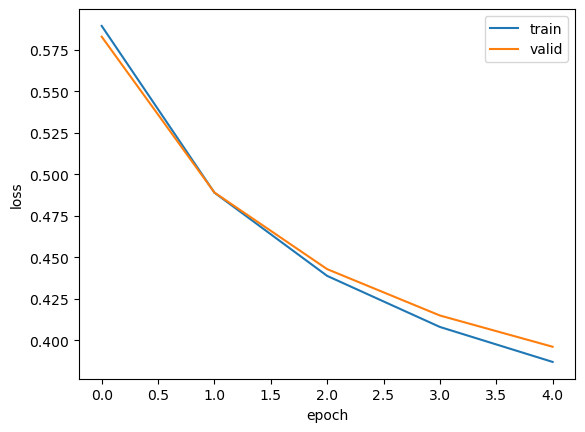

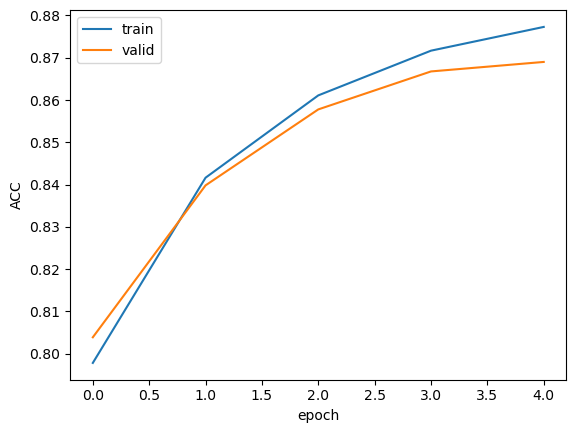

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('log.txt')

# ロスの表示
plt.plot(df['epoch'], df['train_loss'], label='train')
plt.plot(df['epoch'], df['valid_loss'], label='valid')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# ACCの表示
plt.plot(df['epoch'], df['train_acc'], label='train')
plt.plot(df['epoch'], df['valid_acc'], label='valid')
plt.xlabel('epoch')
plt.ylabel('ACC')
plt.legend()

plt.show()

set_xlabel で個別のグラフのラベルを書けそう

<h2 id="76-チェックポイント">76. チェックポイント</h2>
<p>問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．</p>


In [132]:
def train_SGD_plot_checkpoint(train_X, train_y, valid_X, valid_y, features=300, labels=4, lr=0.01, total_epoch=3):
    # ログファイルの初期化
    with open('log.txt', 'w') as f:
        f.write("epoch,train_loss,train_acc,valid_loss,valid_acc\n")

    model = SoftmaxLayer(n_features=features, n_label=labels)
    optim = chainer.optimizers.SGD(lr=lr).setup(model)

    for epoch in range(total_epoch):
        print(f"epoch: {epoch}")
        total_loss = 0.
        for xs, ys in zip(train_X, train_y):
            loss = model(xs[None], ys[None])
            model.cleargrads()
            loss.backward()
            optim.update()
            total_loss += float(loss.data)

        # 毎回ACCを計算する都合上，逐一パラメータを保存する
        # ファイル名を毎回変更しながら保存する
        chainer.serializers.save_npz(f'model_param/model_param_epoch{epoch}.npz', model) # ここを変更

        # ここで訓練データのロスと，ACCを計算
        train_loss, train_acc = loss_and_ACC(train_X, train_y)

        # ここでvalidデータのロスと，ACCを計算
        valid_loss, valid_acc = loss_and_ACC(valid_X, valid_y)

        # ログファイルに書き込む
        with open('log.txt', 'a') as f:
            f.write(f"{epoch},{train_loss},{train_acc},{valid_loss},{valid_acc}\n")

        # 表示
        print(f"train_loss: {train_loss}")
        print(f"train_acc : {train_acc}")
        print(f"valid_loss: {valid_loss}")
        print(f"valid_acc: {valid_acc}")

    print("training complete")

In [133]:
train_SGD_plot_checkpoint(train_X, train_y, valid_X, valid_y)

epoch: 0
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
epoch: 1
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
epoch: 2
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
training complete


<h2 id="77-ミニバッチ化">77. ミニバッチ化</h2>
<p>問題76のコードを改変し，\(B\)事例ごとに損失・勾配を計算し，行列\(W\)の値を更新せよ（ミニバッチ化）．\(B\)の値を\(1, 2, 4, 8, \dots\)と変化させながら，1エポックの学習に要する時間を比較せよ．</p>


In [153]:
import time 

def train_SGD_plot_checkpoint_batch(train_X, train_y, valid_X, valid_y, features=300, labels=4, lr=0.01, total_epoch=3, batch_size=32):
    # 時間計測スタート
    start_time = time.time()
    
    # ログファイルの初期化
    with open('log.txt', 'w') as f:
        f.write("epoch,train_loss,train_acc,valid_loss,valid_acc\n")

    model = SoftmaxLayer(n_features=features, n_label=labels)
    optim = chainer.optimizers.SGD(lr=lr).setup(model)

    # batch数を計算
    # 割り切れるときはそのまま
    if train_X.shape[0] % batch_size:
        total_batch = train_X.shape[0] // batch_size
    # 割り切れないときはあまりの分を一つ足す
    else:
        total_batch = train_X.shape[0] // batch_size + 1
    print(f"total_batch: {total_batch}")

    for epoch in range(total_epoch):
        print(f"epoch: {epoch}")
        total_loss = 0.

        # ここをバッチサイズ毎に変更
        for n in range(total_batch - 1): # 1減らさないとエラーになる
            # バッチサイズ毎にロスを計算
            xs = train_X[n * batch_size : (n+1) * batch_size]
            ys = train_y[n * batch_size : (n+1) * batch_size]

            # 要素数が１つだけ余ったときに次元数が下がってしまうのを防止
            xs = np.atleast_2d(xs)
            ys = np.atleast_1d(ys)

            loss = model(xs, ys)
            model.cleargrads()
            loss.backward()
            optim.update()
            total_loss += float(loss.data)

        # 毎回ACCを計算する都合上，逐一パラメータを保存する
        # ファイル名を毎回変更しながら保存する
        chainer.serializers.save_npz(f'model_param/model_param_epoch{epoch}.npz', model)

        # ここで訓練データのロスと，ACCを計算
        train_loss, train_acc = loss_and_ACC(train_X, train_y)

        # ここでvalidデータのロスと，ACCを計算
        valid_loss, valid_acc = loss_and_ACC(valid_X, valid_y)

        # ログファイルに書き込む
        with open('log.txt', 'a') as f:
            f.write(f"{epoch},{train_loss},{train_acc},{valid_loss},{valid_acc}\n")

        # 表示
        print(f"train_loss: {train_loss}")
        print(f"train_acc : {train_acc}")
        print(f"valid_loss: {valid_loss}")
        print(f"valid_acc: {valid_acc}")

    print("training complete")

    # 経過時間
    elapsed_time = time.time() - start_time
    print(f"elapsed_time: {elapsed_time}")

    # 経過時間を返す
    return elapsed_time

In [156]:
# 解答の時間の減り方と合ってないのが気になる．．．
elapsed_times = []
for batch_size in [1, 2, 4, 8, 16, 32, 64, 128]:
    elapsed_time = train_SGD_plot_checkpoint_batch(train_X, train_y, valid_X, valid_y, batch_size=batch_size)
    elapsed_times.append(elapsed_time)
elapsed_times

total_batch: 10685
epoch: 0
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
epoch: 1
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
epoch: 2
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
training complete
elapsed_time: 12.449589967727661
total_batch: 5343
epoch: 0
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
epoch: 1
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
epoch: 2
train_loss: 0.3868858516216278
train_acc : 0.8772931486334706
valid_loss: 0.39603641629219055
valid_acc: 0.8690119760479041
training complete
elapsed_time: 8.378726959228516
total_batch: 2672
epoch: 0
train_loss: 0.3868858516216278
train_

[12.449589967727661,
 8.378726959228516,
 6.411647081375122,
 5.273721933364868,
 4.750792026519775,
 4.513277053833008,
 4.339132070541382,
 4.300693035125732]

GPU：

<h2 id="78-gpu上での学習">78. GPU上での学習</h2>
<p>問題77のコードを改変し，GPU上で学習を実行せよ．</p>


<h2 id="79-多層ニューラルネットワーク">79. 多層ニューラルネットワーク</h2>
<p>問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．</p>
